### Linear Regression

1. Define the Problem:
Determine the type of problem you're solving (e.g., classification, regression, clustering).
Define the input features and target variable(s).
Establish the metrics you'll use to evaluate the model's performance.

2. Gather Data:
Collect relevant data that could be used to train and test the model.
Ensure data is of good quality and pertains to the problem you're solving.
Data Preprocessing:

3. Handle missing values.
Convert categorical data to numeric format (one-hot encoding, label encoding).
Normalize or standardize features, especially if using algorithms sensitive to feature scales.
Split the data into training, validation (optional), and test sets.
Exploratory Data Analysis (EDA):

4. Visualize the data to understand distributions, relationships, and potential outliers.
Identify patterns, correlations, and feature importance.
Feature Engineering:

5. Create new features that may improve model performance.
Reduce dimensionality using techniques like PCA, if necessary.
Select and Train a Model:

6. Choose a suitable machine learning algorithm based on the problem type and data characteristics.
Train the model using the training data.
Model Evaluation:

7. Evaluate the model's performance on the validation set using predefined metrics.
Fine-tune and optimize model hyperparameters to improve performance, potentially using techniques like grid search or random search.

8. Model Testing:
Test the model's performance on the unseen test set to get an unbiased evaluation.

9. Deploy the Model (if applicable):
Convert the model to a suitable format for deployment.
Integrate the model into the desired application or platform.
Monitor the model's performance in a real-world setting and retrain as necessary.

10.Iterate:
Based on the results, insights, or changing requirements, you might need to return to previous steps and make modifications.

Remember, this is a general template, and real-world scenarios might require adjustments or additional steps based on specific needs and challenges.

#### 1. Define the Problem

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#### 2. Data Collection

In [5]:
data = datasets.load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

#### 3. Handling Missing Values

In [6]:
if df.isnull().any().any():
    print("There are missing values in the dataset.")
else:
    print("There are no missing values in the dataset.")

There are no missing values in the dataset.


#### 4. Exploratory Data Analysis (EDA)

In [13]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00
mean,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,152.13
std,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,77.09
min,-0.11,-0.04,-0.09,-0.11,-0.13,-0.12,-0.10,-0.08,-0.13,-0.14,25.00
25%,-0.04,-0.04,-0.03,-0.04,-0.03,-0.03,-0.04,-0.04,-0.03,-0.03,87.00
50%,0.01,-0.04,-0.01,-0.01,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,140.50
75%,0.04,0.05,0.03,0.04,0.03,0.03,0.03,0.03,0.03,0.03,211.50
max,0.11,0.05,0.17,0.13,0.15,0.20,0.18,0.19,0.13,0.14,346.00


Distribution Plots

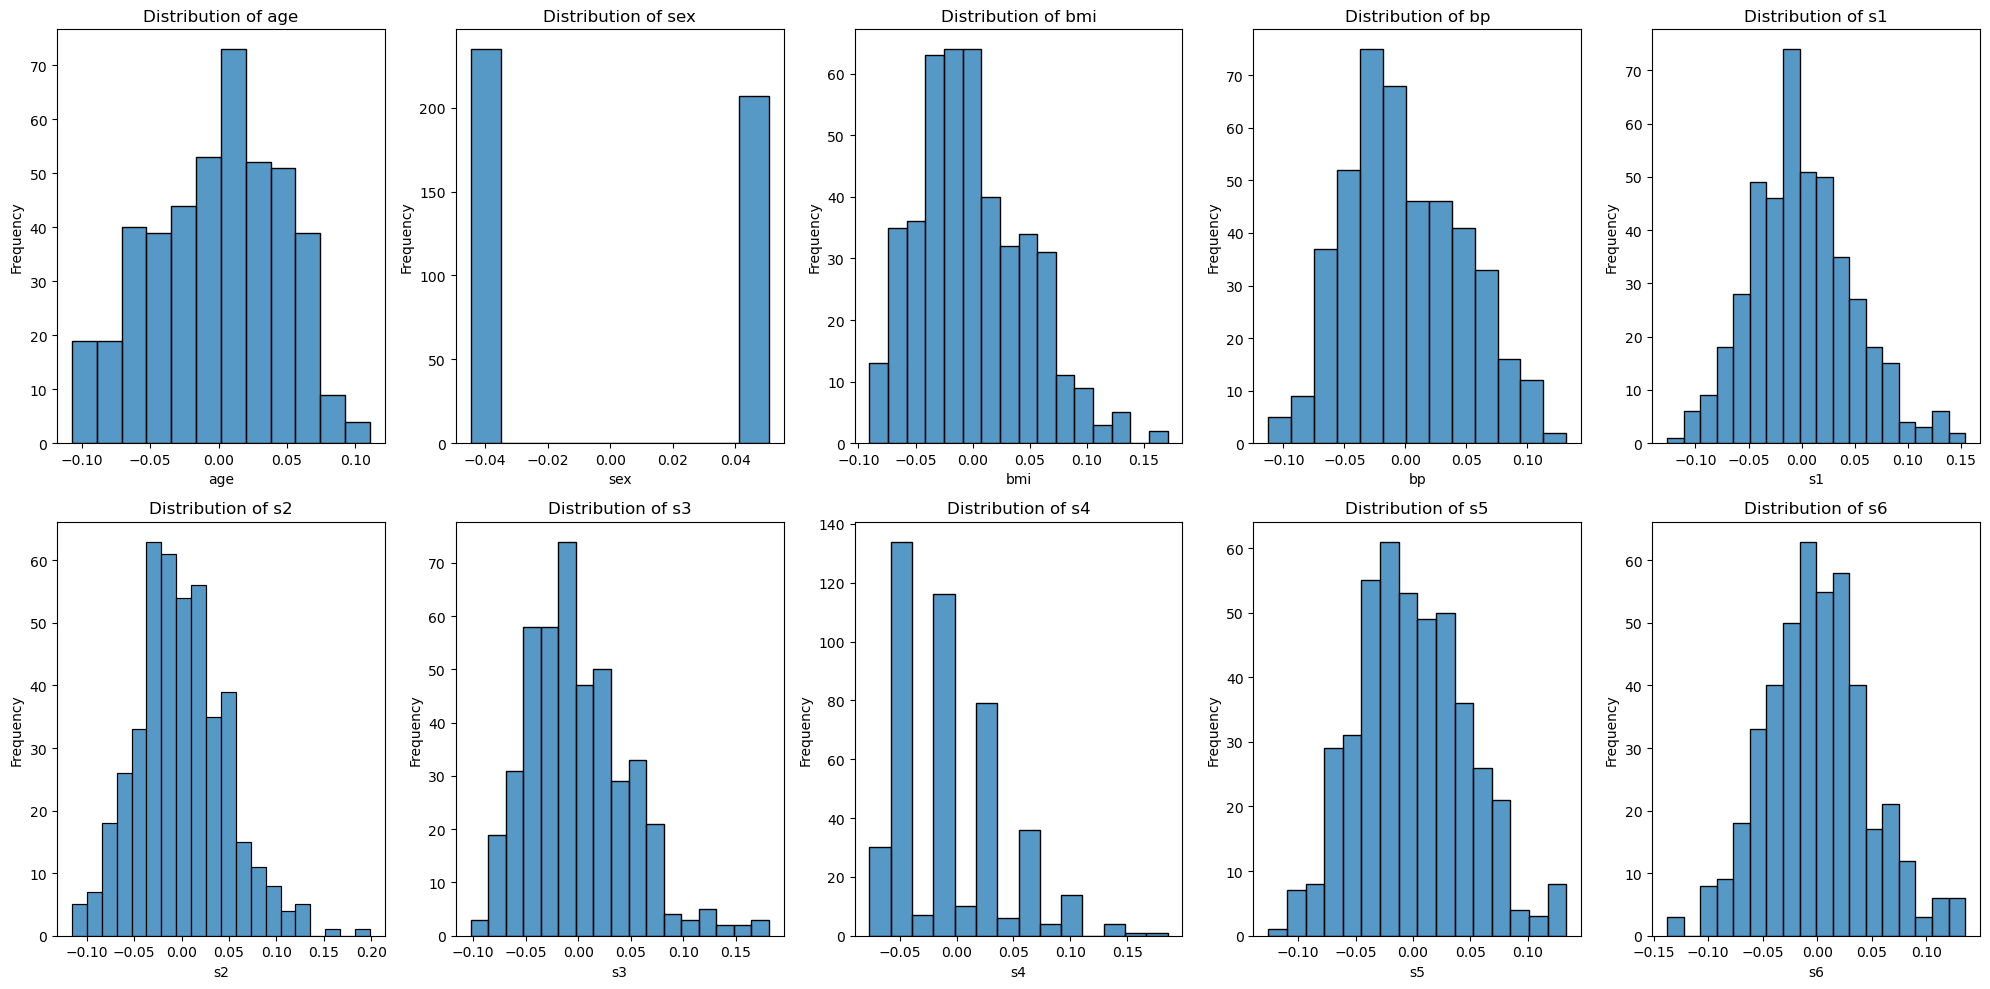

In [8]:
# Setting up a grid for plots
plt.figure(figsize=(20, 10))
for i, col in enumerate(df.columns[:-1], 1):  # Exclude target column
    plt.subplot(2, 5, i)
    sns.histplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Correlation Matrix

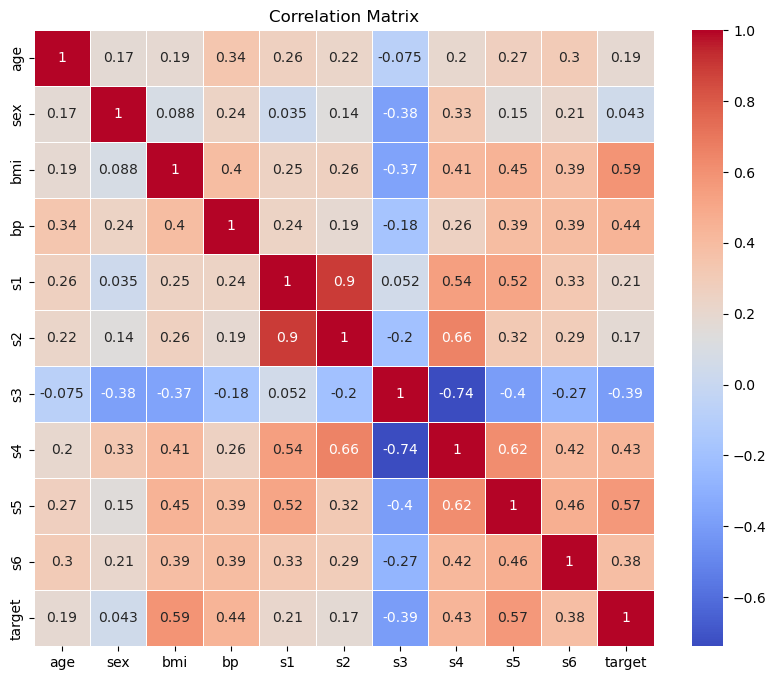

In [9]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#### Box Plots for each feature

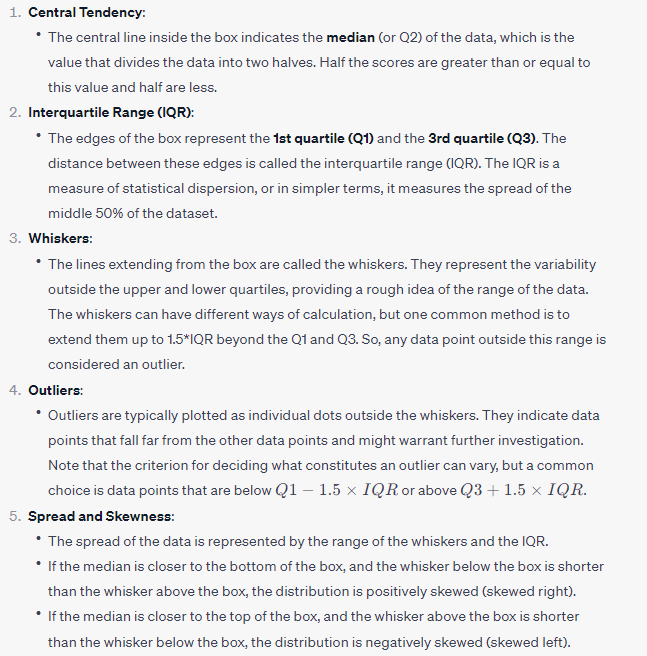
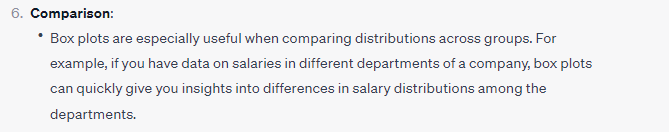

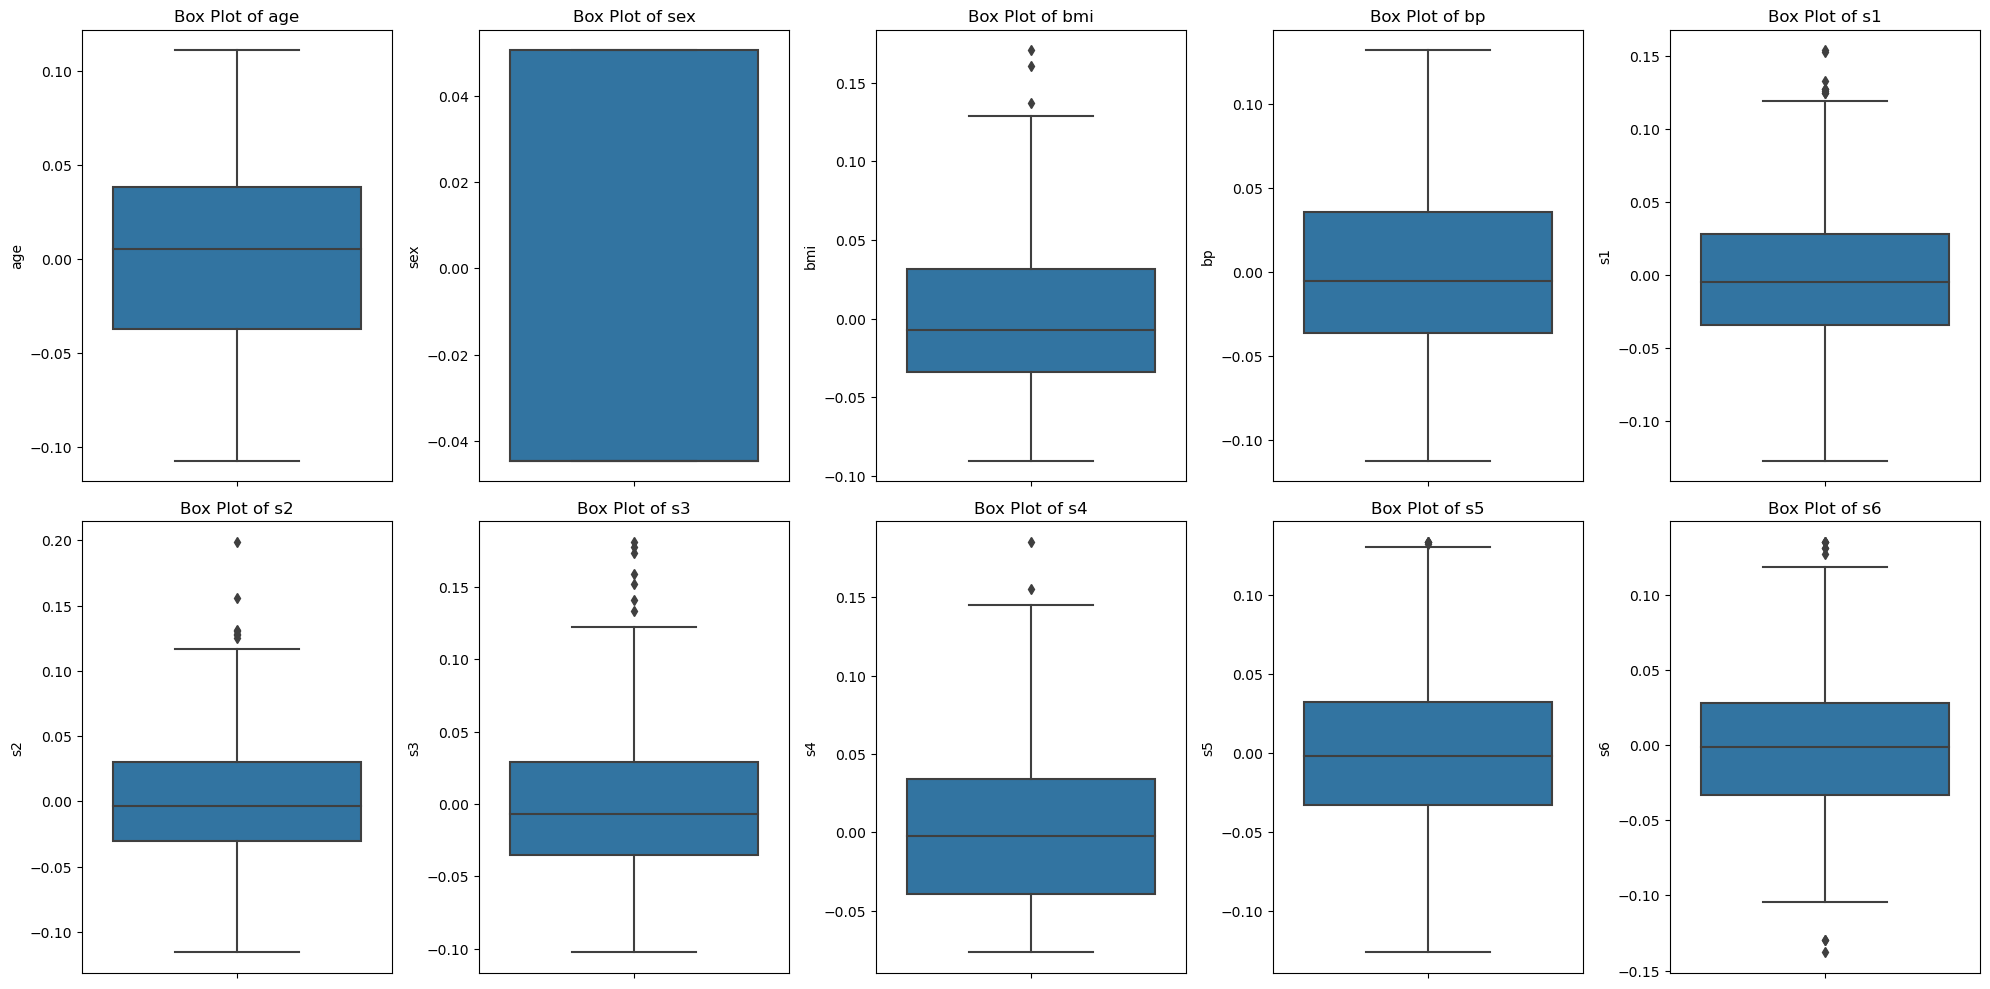

In [10]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(df.columns[:-1], 1):  # Exclude target column
    plt.subplot(2, 5, i)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

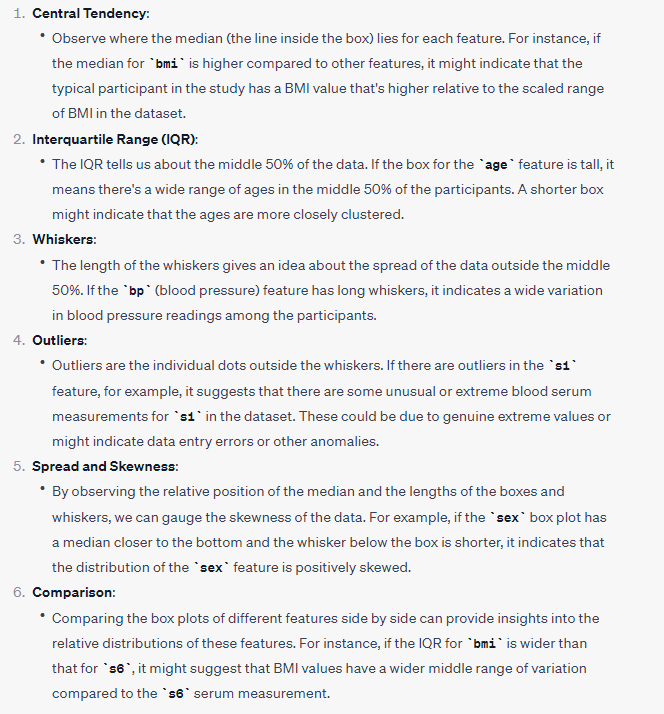
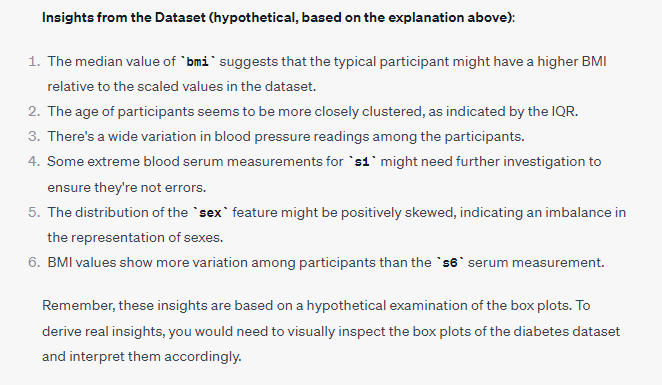

#### 5. Feature Engineering

In [11]:
# Separate features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### 6. Model Training and Evaluation

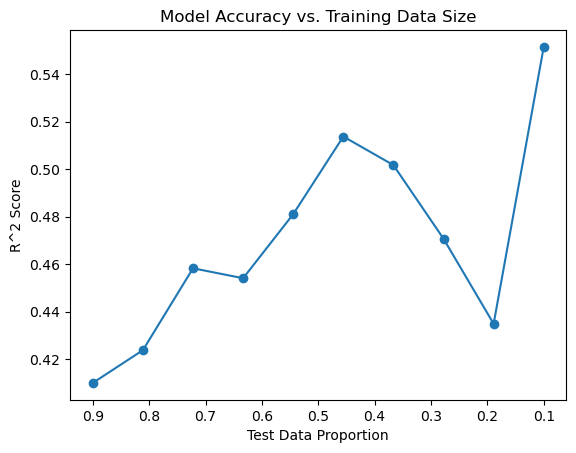

Model R^2 Score: 0.4526


In [12]:
# Define the Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#Train the Model and Visualize the Improvement
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

test_size_values = np.linspace(0.9, 0.1, 10)
accuracies = []

for test_size in test_size_values:
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_size, random_state=42)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    accuracies.append(score)

plt.plot(test_size_values, accuracies, marker='o')
plt.title('Model Accuracy vs. Training Data Size')
plt.xlabel('Test Data Proportion')
plt.ylabel('R^2 Score')
plt.gca().invert_xaxis()  # So that the leftmost point corresponds to the smallest training data size
plt.show()

#Calculating Accuracy
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(f"Model R^2 Score: {accuracy:.4f}")


Note, I havent religiously followed all steps discussed at the beginning when build the Model since the applicability depends on the use case

#### 7. Model Improvement

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
import numpy as np

# Load data
data = load_diabetes()
X = data.data
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline that first adds polynomial features and then applies Ridge regression
degree = 2
alpha = 1.0  # Regularization strength; increasing values mean more regularization
model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha))

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate the model's R^2 (this is our "accuracy" for regression problems)
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2:.4f}')


R^2 Score: 0.4196


In [15]:
# Polynomial Feature, Ridge Regressor

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
import numpy as np

# Load data
data = load_diabetes()
X = data.data
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline
model = make_pipeline(PolynomialFeatures(), Ridge())

# Define the hyperparameters and their possible values
param_grid = {
    'polynomialfeatures__degree': [1, 2, 3, 4],
    'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Grid Search with Cross-Validation
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train, y_train)

# Print the best parameters
print("Best parameters: ", grid.best_params_)

# Evaluate the model
model = grid.best_estimator_
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2:.4f}')


Best parameters:  {'polynomialfeatures__degree': 2, 'ridge__alpha': 0.1}
R^2 Score: 0.4659


In [16]:
#Random Forest, GridSearch

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_diabetes

# Load data
data = load_diabetes()
X = data.data
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Instantiate Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Grid search with cross-validation
grid = GridSearchCV(rf, param_grid, cv=5)
grid.fit(X_train, y_train)

# Best parameters
print("Best parameters: ", grid.best_params_)

# Evaluate the model
model = grid.best_estimator_
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2:.4f}')


Best parameters:  {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
R^2 Score: 0.4463


In [17]:
# Gradient Boosting

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_diabetes

# Load data
data = load_diabetes()
X = data.data
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1]
}

# Instantiate Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

# Grid search with cross-validation
grid = GridSearchCV(gbr, param_grid, cv=5)
grid.fit(X_train, y_train)

# Best parameters
print("Best parameters: ", grid.best_params_)

# Evaluate the model
model = grid.best_estimator_
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2:.4f}')


Best parameters:  {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.8}
R^2 Score: 0.4449


Conclusion: 
Even on performing data validation checks, feature engineering, tried with different models, grid search, regularization, if there is no improvement in accuracy, try to gather additional data in a balanced way and train the Model again with the tried and new approaches